In [14]:

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")



In [15]:
# Load the COVID-19 dataset
df = pd.read_csv("owid-covid-data.csv")

# Basic exploration
df.shape, df.columns


((350085, 67),
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
        'new_cases_smoothed', 'total_deaths', 'new_deaths',
        'new_deaths_smoothed', 'total_cases_per_million',
        'new_cases_per_million', 'new_cases_smoothed_per_million',
        'total_deaths_per_million', 'new_deaths_per_million',
        'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
        'icu_patients_per_million', 'hosp_patients',
        'hosp_patients_per_million', 'weekly_icu_admissions',
        'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
        'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
        'total_tests_per_thousand', 'new_tests_per_thousand',
        'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
        'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
        'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
        'new_vaccinations', 'new_vac

In [16]:
# Preview data
df.head()

# Check for nulls
df.isnull().sum().sort_values(ascending=False).head(15)


weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality                           337901
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality_cumulative_per_million    337901
weekly_hosp_admissions                     326832
weekly_hosp_admissions_per_million         326832
icu_patients_per_million                   312470
icu_patients                               312470
hosp_patients_per_million                  311183
hosp_patients                              311183
total_boosters_per_hundred                 302523
total_boosters                             302523
new_vaccinations                           284739
dtype: int64

In [17]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Select countries to track
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

# Drop rows with critical nulls
df_filtered = df_filtered.dropna(subset=['total_cases', 'total_deaths', 'total_vaccinations'])

# Fill the rest
df_filtered.fillna(0, inplace=True)

df_filtered.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
140151,IND,Asia,India,2021-01-15,10527683.0,15590.0,16323.714,151918.0,191.0,192.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
140152,IND,Asia,India,2021-01-16,10542841.0,15158.0,15886.000,152093.0,175.0,185.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
140153,IND,Asia,India,2021-01-17,10557985.0,15144.0,15385.857,152274.0,181.0,182.143,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
140154,IND,Asia,India,2021-01-18,10571773.0,13788.0,15025.429,152419.0,145.0,179.857,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
140155,IND,Asia,India,2021-01-19,10581837.0,10064.0,14665.429,152556.0,137.0,175.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0


C:\Users\dell\AppData\Local\Temp\ipykernel_10416\4160098543.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


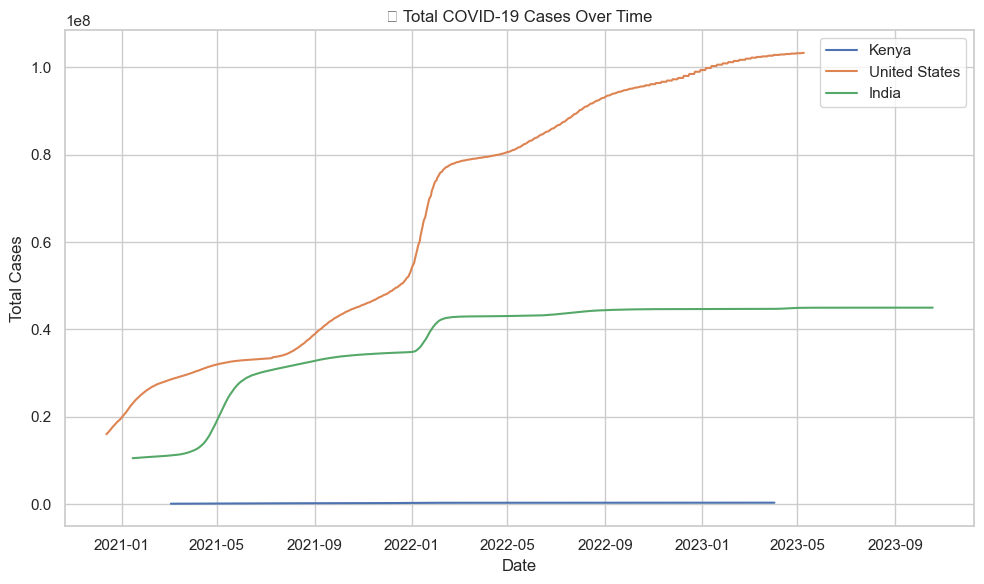

In [18]:
# Plot total cases over time
plt.figure(figsize=(10, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title("📊 Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_10416\2251472564.py:11: UserWarning: Glyph 9760 (\N{SKULL AND CROSSBONES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dell\AppData\Local\Temp\ipykernel_10416\2251472564.py:11: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9760 (\N{SKULL AND CROSSBONES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


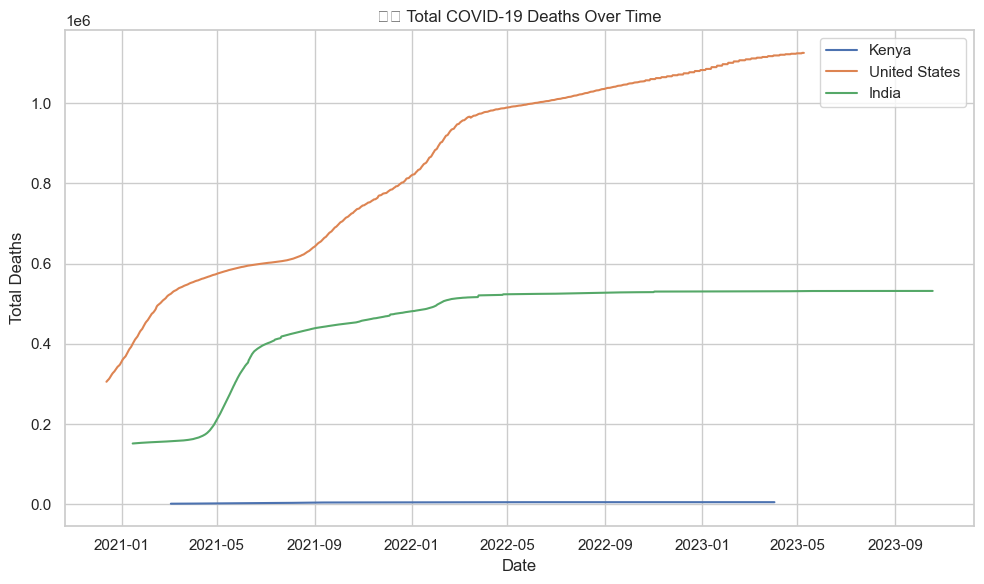

In [19]:
# Plot total deaths
plt.figure(figsize=(10, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_deaths'], label=country)

plt.title("☠️ Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_10416\4156163158.py:11: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


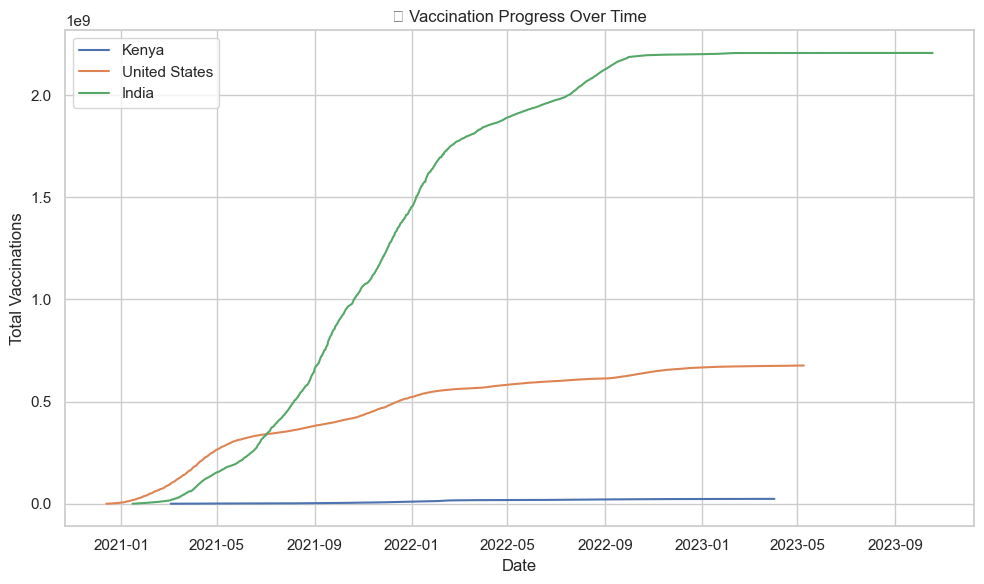

In [20]:
# Vaccination rollout
plt.figure(figsize=(10, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)

plt.title("💉 Vaccination Progress Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# Add death rate column
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Preview
df_filtered[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']].tail()


,location,date,total_cases,total_deaths,death_rate
330699,United States,2023-05-05,103266404.0,1124063.0,0.010885
330700,United States,2023-05-06,103266404.0,1124063.0,0.010885
330701,United States,2023-05-07,103343569.0,1125209.0,0.010888
330702,United States,2023-05-08,103343569.0,1125209.0,0.010888
330703,United States,2023-05-09,103343569.0,1125209.0,0.010888


## 🔍 Key Insights

1. 🇺🇸 The United States has the highest total cases and vaccinations among the selected countries.
2. 🇮🇳 India experienced rapid growth in total cases mid-2021.
3. 🇰🇪 Kenya's vaccination numbers remain significantly lower than the US and India.
4. Death rates have generally decreased over time as vaccination increased.
5. Visual data shows that countries with better vaccination rollout tend to have flatter growth in new cases.

---
